# Using the Prebuilt React Agent with LangGraph

In this tutorial, we will use the prebuilt React agent from LangGraph.  The agent will use an external web search tool (Tavily) to respond to user queries.



### Imports
We start by importing the necessary libraries:

In [65]:
from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults
from langgraph.prebuilt import create_react_agent

from dotenv import load_dotenv
_ = load_dotenv()


In [66]:
# Initialize the model
model = ChatOpenAI(model="gpt-4o")

### ̉Defining the Tools

We will define two tools:
- Tavily Search tool to fetch relevant information from the web.
- A tool to get the current date and time. This helps the agent to respond to time-based queries.


In [67]:
tavily_search = TavilySearchResults(max_results=5)


In [68]:
from langchain_core.tools import tool
from datetime import datetime

@tool
def get_current_date():
    """Returns the current date and time. Use this tool first for any time-based queries."""
    return f"The current date is: {datetime.now().strftime('%d %B %Y')}"

In [69]:

# list of tools for the agent
tools = [tavily_search, get_current_date]

### Creating the ReAct Agent
Next, we will use LangGraph's prebuilt ReAct agent structure. The agent will use the provided tools (in this case, Tavily Search) when necessary, based on the user's query.

In [70]:
graph = create_react_agent(model, tools)

### Visualizing the Agent's Decision-Making Flow
The ReAct agent has a graph based workflow. We can visualize the workflow using langgraph's in-built graph visualization.


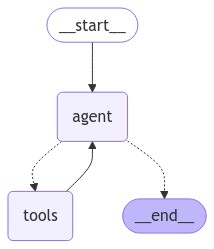

In [71]:
from IPython.display import display, Image

# Visualize the agent's decision-making flow
display(Image(graph.get_graph().draw_mermaid_png()))

### Running the Agent with Queries
Now, we can test our agent with different queries.

In [72]:
# helper function to render markdown
from IPython.display import Markdown, display

def render_markdown(md_string):
    display(Markdown(md_string))

In [73]:
# Helper function to stream the agent's response
def process_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
    # return the last message
    return message 

In [74]:
# helper function to process query
def process_query(query):
    inputs = {"messages": [("user", query)]}
    message = process_stream(graph.stream(inputs, stream_mode="values"))
    render_markdown(f"## Answer:\n{message.content}")


In [75]:
# Query that will trigger the Tavily search tool
process_query("Who won the latest F1 race in singapore?")

================================ Human Message =================================

Who won the latest F1 race in singapore?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_eaJNy92Pr0N49vGR9nbblrSC)
 Call ID: call_eaJNy92Pr0N49vGR9nbblrSC
  Args:
  tavily_search_results_json (call_QKMDsDQUP09u8dtHwxjWrgwA)
 Call ID: call_QKMDsDQUP09u8dtHwxjWrgwA
  Args:
    query: latest F1 race Singapore winner
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.nytimes.com/athletic/5785036/2024/09/22/lando-norris-f1-singapore-gp-win/", "content": "Lando Norris wins F1’s Singapore Grand Prix, tightens title fight with Max Verstappen - The Athletic Lando Norris wins his third Formula One race of the season, taking the Singapore Grand Prix 20 seconds ahead of Max Verstappen. Lewis Hamilton was among the first frontrunners to pit, swapping his soft tires

## Answer:
The latest F1 race in Singapore was won by Lando Norris. He secured victory at the Singapore Grand Prix, finishing 20 seconds ahead of Max Verstappen.

In [76]:
# Query that will trigger the Tavily search tool
process_query("What is the weather in Tokyo tomorrow?")

================================ Human Message =================================

What is the weather in Tokyo tomorrow?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_3xkq4ouWW850oAfVe57LyztP)
 Call ID: call_3xkq4ouWW850oAfVe57LyztP
  Args:
  tavily_search_results_json (call_jFYRpqsnip37hwGabz0jrrDv)
 Call ID: call_jFYRpqsnip37hwGabz0jrrDv
  Args:
    query: Tokyo weather forecast for tomorrow
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Tokyo', 'region': 'Tokyo', 'country': 'Japan', 'lat': 35.6895, 'lon': 139.6917, 'tz_id': 'Asia/Tokyo', 'localtime_epoch': 1728807510, 'localtime': '2024-10-13 17:18'}, 'current': {'last_updated_epoch': 1728807300, 'last_updated': '2024-10-13 17:15', 'temp_c': 25.3, 'temp_f': 77.5, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon':

## Answer:
The current date is October 13, 2024. Here is the weather forecast for Tokyo tomorrow, October 14, 2024:

1. **Temperature**: Expect cooler weather with a temperature around 22.4°C (72.3°F), which is slightly below the historical average for this time of year.

2. **Conditions**: It is forecasted to be partly cloudy with no significant precipitation expected.

3. **Wind**: The wind conditions will likely remain moderate, with details on speed and direction yet to be specified.

For more detailed and hourly updates, you might want to check these resources:
- [Weather API](https://www.weatherapi.com/)
- [World Weather Info](https://world-weather.info/forecast/japan/tokyo/14-october/)
- [Ease Weather](https://www.easeweather.com/asia/japan/tokyo/october)

In [77]:
# Query that will trigger the Tavily search tool
process_query("Is it colder in toronto or singapore today?")

================================ Human Message =================================

Is it colder in toronto or singapore today?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_hbXJOkkWeilB2DQGBwbtFVD1)
 Call ID: call_hbXJOkkWeilB2DQGBwbtFVD1
  Args:
  tavily_search_results_json (call_EEregihfzLojpWbL3pruSSAU)
 Call ID: call_EEregihfzLojpWbL3pruSSAU
  Args:
    query: current weather in Toronto
  tavily_search_results_json (call_QEdjjLg9akQgehlbOlFiHL4t)
 Call ID: call_QEdjjLg9akQgehlbOlFiHL4t
  Args:
    query: current weather in Singapore
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Singapore', 'region': '', 'country': 'Singapore', 'lat': 1.293, 'lon': 103.856, 'tz_id': 'Asia/Singapore', 'localtime_epoch': 1728807518, 'localtime': '2024-10-13 16:18'}, 'current': {'last_update

## Answer:
As of October 13, 2024, the current temperatures are:

- **Toronto, Canada**: 10.4°C (50.7°F) with partly cloudy conditions.
- **Singapore**: 28.2°C (82.7°F) with light rain showers.

Therefore, it is colder in Toronto compared to Singapore today.

### Conclusion 

Congratulations on using a prebuilt ReAct agent with LangGraph!

Here are a few things you can try next:
- Try updating the prompts for the agent to see how it responds to different queries.
- Integrate the agent with additional tools, such as the Python Executor, to enable it to perform calculations.
